### Multiple Linear Regression
- One dependent variable and multiple independent variables
- y=b0+ b1x1 + b2x2 +........+ bnxn
- price of the house

### Process using sklearn
- Read the data
- Cleaning/analyzing 
- Separate the data for dependent and independent variables(features and target)
- Split the data for Train/test
- select the required model
- fit our traning data
- predict the data using test data
- cpmpare the actual and predicted data
- calulate the evaluation metrics

In [3]:
#reading the data
import pandas as pd
data=pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Regression/FuelConsumptionCo2.csv")

In [4]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
data.shape

(1067, 13)

In [6]:
data.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [7]:
data['MODELYEAR'].value_counts()

2014    1067
Name: MODELYEAR, dtype: int64

In [11]:
x=data[["FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB"]]
y=data["CO2EMISSIONS"]

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_train

,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
263,16.0,11.1,13.8
1058,13.2,9.5,11.5
117,15.0,9.8,12.7
553,21.3,14.1,18.1
225,30.0,20.4,25.7
...,...,...,...
190,12.7,7.9,10.5
375,14.0,10.3,12.3
89,11.9,8.3,10.3
797,9.3,7.5,8.5


In [15]:
x_test

,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
414,10.9,7.5,9.4
721,9.2,6.6,8.0
603,9.8,6.6,8.4
313,16.7,10.3,13.8
82,10.4,6.7,8.7
...,...,...,...
878,12.6,8.6,10.8
758,17.6,13.1,15.6
766,17.2,13.5,15.5
1044,10.0,6.9,8.6


In [16]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred=model.predict(x_test)

In [21]:
model.predict([[6.0,5.8,5.9]])

array([153.88011388])

In [22]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [23]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred)*100

80.16277792032481

In [26]:
mean_squared_error(y_test,y_pred)**0.5

28.3363672028584

In [27]:
model.coef_

array([ 4.447382  , -9.59883899, 18.62345253])

## Polynomial Regression

In [28]:
df=pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Regression/china_gdp.csv")

In [29]:
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [31]:
df.shape

(55, 2)

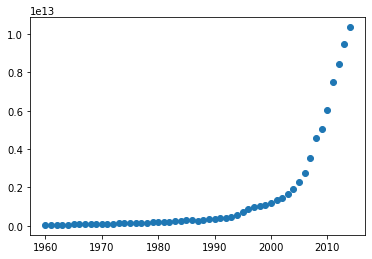

In [34]:
import matplotlib.pyplot as plt
plt.scatter(df["Year"],df["Value"])

In [40]:
x=df["Year"].values.reshape(-1,1)
y=df["Value"]

In [42]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(x)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_poly,y)

LinearRegression()

In [43]:
y_pred=model.predict(x_poly)
r2_score(y,y_pred)*100

96.45101047000898

In [45]:
mean_squared_error(y,y_pred)

2.177936487194082e+23

<function matplotlib.pyplot.show(close=None, block=None)>

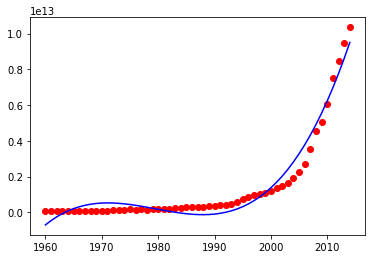

In [48]:
plt.scatter(df['Year'],df['Value'],c="red")
plt.plot(x,y_pred,c="blue")
plt.show

In [49]:
acc=[]
for i in range(2,20):
    poly=PolynomialFeatures(degree=3)
    x_poly=poly.fit_transform(x)
    model=LinearRegression()
    model.fit(x_poly,y)
    y_pred=model.predict(x_poly)
    acc.append(r2_score(y,y_pred)*100)

In [54]:
acc

[96.45101047000898,
 96.45101047000898,
 96.45101047000898,
 96.45101047000898,
 96.45101047000898,
 96.45101047000898,
 96.45101047000898,
 96.45101047000898,
 96.45101047000898,
 96.45101047000898,
 96.45101047000898,
 96.45101047000898,
 96.45101047000898,
 96.45101047000898,
 96.45101047000898,
 96.45101047000898,
 96.45101047000898,
 96.45101047000898]

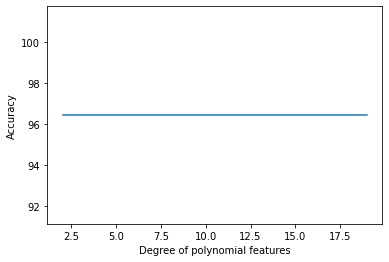

In [53]:
import numpy as np
plt.plot(np.arange(2,20),acc)
plt.xlabel("Degree of polynomial features")
plt.ylabel("Accuracy")
plt.show()